In [121]:
import pandas as pd
import numpy as np
from datetime import datetime
import yfinance as yf

import matplotlib.pyplot as plt
%matplotlib inline

In [122]:
#df = yf.download("PETR4.SA","2018-01-01","2021-12-31")
df = yf.download("CSNA3.SA","2018-01-01","2021-12-31")

df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,8.450000,8.680000,8.420000,8.680000,6.914596,9540800
2018-01-03,8.670000,9.000000,8.610000,9.000000,7.169512,11652200
2018-01-04,9.180000,9.490000,9.180000,9.280000,7.392563,15001700
2018-01-05,9.350000,9.490000,9.090000,9.490000,7.559852,16916400
2018-01-08,9.470000,9.950000,9.430000,9.950000,7.926294,15585700
...,...,...,...,...,...,...
2021-09-24,29.700001,29.719999,28.850000,29.030001,29.030001,12884500
2021-09-27,29.490000,30.360001,28.750000,29.969999,29.969999,19275500
2021-09-28,29.430000,29.639999,27.620001,27.620001,27.620001,15271000


In [123]:
#plt.style.use("fivethirtyeight")
plt.style.use("ggplot")

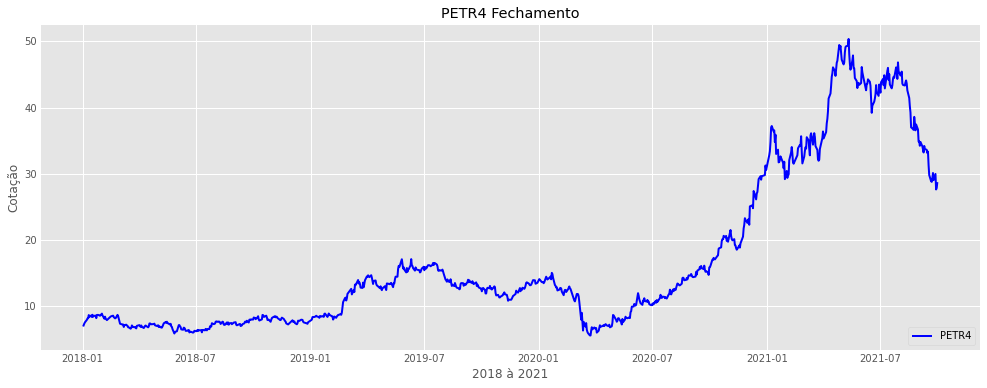

In [124]:
plt.figure(figsize=(15,6))
plt.plot(df["Adj Close"], label="PETR4", linewidth = 2, color = 'blue')
plt.title("PETR4 Fechamento")
plt.xlabel("2018 à 2021")
plt.ylabel("Cotação")
plt.legend(loc = "lower right")
plt.show()

In [125]:
#p1 = 10
#p2 = 25
p1 = 9
p2 = 21

ma1 = pd.DataFrame()
ma1["mmCurta"] = df["Adj Close"].rolling(window=p1).mean()

ma2 = pd.DataFrame()
ma2["mmLonga"] = df["Adj Close"].rolling(window=p2).mean()

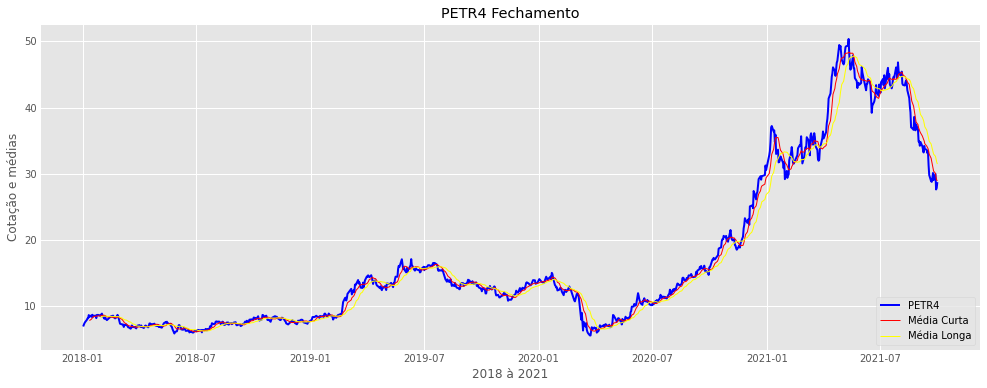

In [126]:
plt.figure(figsize=(15,6))
plt.plot(df["Adj Close"], label="PETR4", linewidth = 2, color = 'blue')
plt.plot(ma1["mmCurta"], label="Média Curta", linewidth = 1, color = 'red')
plt.plot(ma2["mmLonga"], label="Média Longa", linewidth = 1, color = 'yellow')
plt.title("PETR4 Fechamento")
plt.xlabel("2018 à 2021")
plt.ylabel("Cotação e médias")
plt.legend(loc = "lower right")
plt.show()

In [127]:
dfRegra = pd.DataFrame()
dfRegra["Ativo"]=df["Adj Close"]
dfRegra["mmCurta"]=ma1["mmCurta"]
dfRegra["mmLonga"]=ma2["mmLonga"]
dfRegra

,Ativo,mmCurta,mmLonga
Date,,,
2018-01-02,6.914596,NaN,NaN
2018-01-03,7.169512,NaN,NaN
2018-01-04,7.392563,NaN,NaN
2018-01-05,7.559852,NaN,NaN
2018-01-08,7.926294,NaN,NaN
...,...,...,...
2021-09-24,29.030001,30.407778,32.955239
2021-09-27,29.969999,30.056667,32.641429
2021-09-28,27.620001,29.421111,32.173334


In [128]:
def regra(base):
    pCompra = []
    pVenda = []
    aux = 1
    
    for i in range(len(base)):
        if base["mmCurta"][i] > base["mmLonga"][i]:
            if aux !=1:
                pCompra.append(base["Ativo"][i])
                pVenda.append(np.nan)
                aux=1  
            else:
                pCompra.append(np.nan)
                pVenda.append(np.nan)
        elif base["mmCurta"][i] < base["mmLonga"][i]:
                if aux!= 0:
                    pCompra.append(np.nan)
                    pVenda.append(base["Ativo"][i])
                    aux = 0
                else:
                    pCompra.append(np.nan)
                    pVenda.append(np.nan)
        else:
                pCompra.append(np.nan)
                pVenda.append(np.nan)
    return(pCompra,pVenda)

In [129]:
compra, venda = regra(dfRegra)
sinal = pd.DataFrame()
sinal["Compra"] = compra
sinal["Venda"] = venda

dfRegra["Compra"] = compra
dfRegra["Venda"] = venda


In [130]:
dfRegra

,Ativo,mmCurta,mmLonga,Compra,Venda
Date,,,,,
2018-01-02,6.914596,NaN,NaN,NaN,NaN
2018-01-03,7.169512,NaN,NaN,NaN,NaN
2018-01-04,7.392563,NaN,NaN,NaN,NaN
2018-01-05,7.559852,NaN,NaN,NaN,NaN
2018-01-08,7.926294,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2021-09-24,29.030001,30.407778,32.955239,NaN,NaN
2021-09-27,29.969999,30.056667,32.641429,NaN,NaN
2021-09-28,27.620001,29.421111,32.173334,NaN,NaN


In [131]:
sinal

,Compra,Venda
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
...,...,...
919,NaN,NaN
920,NaN,NaN
921,NaN,NaN
922,NaN,NaN


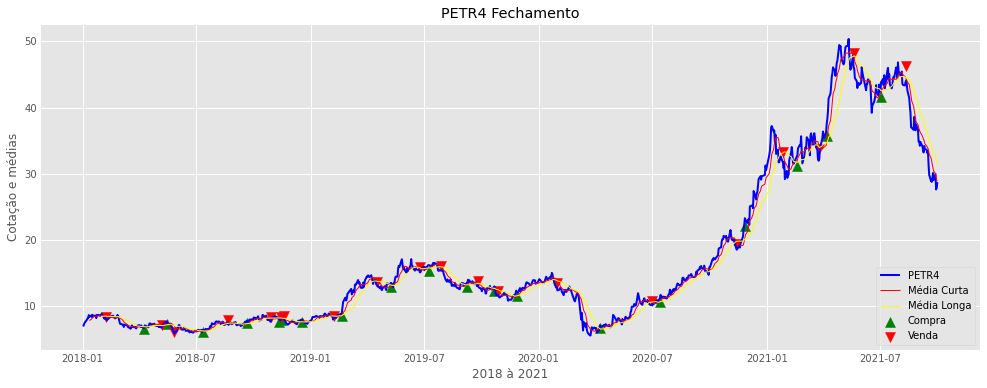

In [132]:
plt.figure(figsize=(15,6))
plt.plot(df["Adj Close"], label="PETR4", linewidth = 2, color = 'blue')
plt.plot(ma1["mmCurta"], label="Média Curta", linewidth = 1, color = 'red')
plt.plot(ma2["mmLonga"], label="Média Longa", linewidth = 1, color = 'yellow')
plt.scatter(dfRegra.index, dfRegra["Compra"]*0.95, label="Compra", marker="^", s = 100, color="g")
plt.scatter(dfRegra.index, dfRegra["Venda"]*1.05, label="Venda", marker="v", s = 100, color="r")
plt.title("PETR4 Fechamento")
plt.xlabel("2018 à 2021")
plt.ylabel("Cotação e médias")
plt.legend(loc = "lower right")
plt.show()

In [133]:
dfCompra = dfRegra[~ dfRegra["Compra"].isna()]
dfCompra

,Ativo,mmCurta,mmLonga,Compra,Venda
Date,,,,,
2018-04-10,6.811037,6.893353,6.881973,6.811037,NaN
2018-05-16,7.631547,7.179248,7.176340,7.631547,NaN
2018-07-12,6.380866,6.270225,6.246959,6.380866,NaN
2018-09-21,7.780092,7.381112,7.344064,7.780092,NaN
2018-11-12,7.985280,8.234167,8.201462,7.985280,NaN
2018-11-16,8.250318,8.194270,8.180699,8.250318,NaN
2018-12-18,7.916883,7.661347,7.616428,7.916883,NaN
2019-02-20,9.011227,8.605598,8.556879,9.011227,NaN
2019-05-10,13.500225,13.186519,13.161128,13.500225,NaN


In [134]:
np.array(dfCompra["Compra"])

array([ 6.81103659,  7.63154697,  6.38086557,  7.78009224,  7.98528004,
        8.25031757,  7.91688347,  9.01122665, 13.50022507, 16.17400169,
       13.62218666, 12.98038673, 12.07990074,  7.09849882, 11.20276546,
       23.27909851, 32.79232788, 37.60174179, 43.84755707])

In [135]:
dfVenda = dfRegra[~ dfRegra["Venda"].isna()]
dfVenda

,Ativo,mmCurta,mmLonga,Compra,Venda
Date,,,,,
2018-02-08,7.997989,8.437896,8.485060,NaN,7.997989
2018-05-08,6.747307,7.007534,7.039778,NaN,6.747307
2018-05-28,5.855101,7.011960,7.052675,NaN,5.855101
2018-08-22,7.527987,7.374861,7.397115,NaN,7.527987
2018-10-30,7.933984,8.106875,8.165636,NaN,7.933984
2018-11-14,7.882686,8.196169,8.200241,NaN,7.882686
2018-11-19,8.062227,8.148672,8.153422,NaN,8.062227
2019-02-07,8.139173,8.465006,8.481562,NaN,8.139173
2019-04-18,13.055164,13.697330,13.726100,NaN,13.055164


In [136]:
np.array(dfVenda["Venda"])

array([ 7.9979887 ,  6.7473073 ,  5.85510111,  7.52798748,  7.9339838 ,
        7.88268566,  8.06222725,  8.13917255, 13.05516434, 15.08572769,
       15.35779667, 13.06660271, 11.69671631, 12.84627151, 10.25240326,
       18.51768303, 31.67877388, 32.12995529, 45.91978455, 44.09999847])

In [137]:
dfCompra.shape

(19, 5)

In [138]:
dfVenda.shape

(20, 5)

In [139]:
np.array(dfVenda["Venda"])[:-1]

array([ 7.9979887 ,  6.7473073 ,  5.85510111,  7.52798748,  7.9339838 ,
        7.88268566,  8.06222725,  8.13917255, 13.05516434, 15.08572769,
       15.35779667, 13.06660271, 11.69671631, 12.84627151, 10.25240326,
       18.51768303, 31.67877388, 32.12995529, 45.91978455])

In [140]:
np.array(np.array(dfVenda["Venda"])[:-1]-np.array(dfCompra["Compra"]))
#np.array(np.array(dfVenda["Venda"])-np.array(dfCompra["Compra"]))


array([ 1.18695211, -0.88423967, -0.52576447, -0.25210476, -0.05129623,
       -0.36763191,  0.14534378, -0.8720541 , -0.44506073, -1.088274  ,
        1.73561001,  0.08621597, -0.38318443,  5.74777269, -0.95036221,
       -4.76141548, -1.113554  , -5.4717865 ,  2.07222748])

In [141]:
resultado = np.array(np.array(dfVenda["Venda"])[:-1]-np.array(dfCompra["Compra"])).sum().round(2)
#resultado = np.array(np.array(dfVenda["Venda"])-np.array(dfCompra["Compra"])).sum().round(2)


In [142]:
print("Resultado por ação: R$ " + str(resultado))

Resultado por ação: R$ -6.19


In [159]:
dfV2 = pd.DataFrame()
dfV2["Venda"]=dfVenda["Venda"].shift(1)
dfV2 =dfV2.dropna(axis = 0)
dfV2.head()

np.array(np.array(dfCompra["Compra"])-np.array(dfV2["Venda"]))

array([-1.18695211,  0.88423967,  0.52576447,  0.25210476,  0.05129623,
        0.36763191, -0.14534378,  0.8720541 ,  0.44506073,  1.088274  ,
       -1.73561001, -0.08621597,  0.38318443, -5.74777269,  0.95036221,
        4.76141548,  1.113554  ,  5.4717865 , -2.07222748])

In [160]:
np.array(np.array(dfCompra["Compra"])-np.array(dfV2["Venda"])).sum().round(2)

6.19